In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/Superstore.xlsx')

# Check the data
df.head()
df.info()
df.describe()

# Create derived features (Pro Tips)
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Month'] = df['Order Date'].dt.to_period('M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Task 1:Profitability by category

In [ ]:
# Calculate average profit margin by category
profit_by_category = df.groupby('Category').agg({
    'Profit': 'sum',
    'Sales': 'sum'
}).reset_index()
profit_by_category

,Category,Profit,Sales
0,Furniture,18451.2728,741999.7953
1,Office Supplies,122490.8008,719047.0320
2,Technology,145454.9481,836154.0330


In [ ]:
#Calculate profit margin percentage
profit_by_category['Profit_Margin_Pct'] = (profit_by_category['Profit'] / profit_by_category['Sales']) * 100
profit_by_category

,Category,Profit,Sales,Profit_Margin_Pct
0,Furniture,18451.2728,741999.7953,2.486695
1,Office Supplies,122490.8008,719047.0320,17.035158
2,Technology,145454.9481,836154.0330,17.395712


In [ ]:
#Sort from highest to lowest
profit_by_category = profit_by_category.sort_values('Profit_Margin_Pct', ascending=False)
profit_by_category

,Category,Profit,Sales,Profit_Margin_Pct
2,Technology,145454.9481,836154.0330,17.395712
1,Office Supplies,122490.8008,719047.0320,17.035158
0,Furniture,18451.2728,741999.7953,2.486695


Furniture severely underperforms at only 2.49% margin

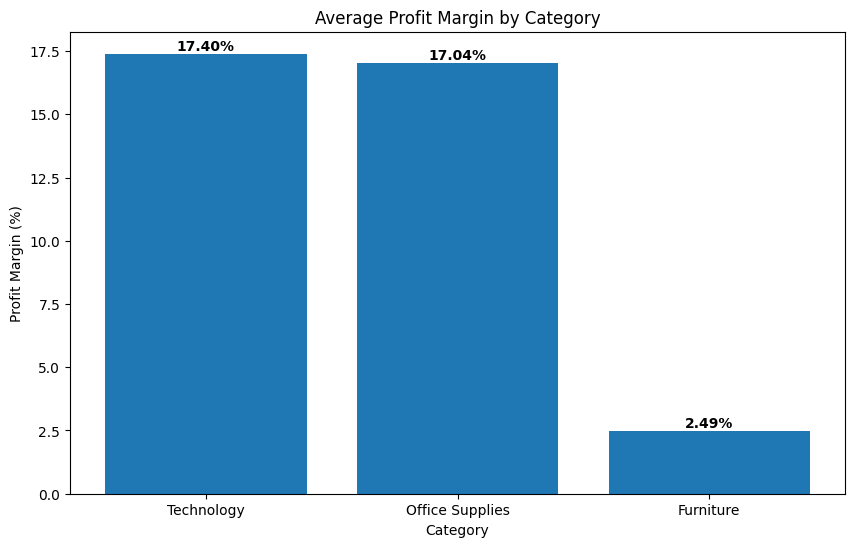

In [ ]:
#Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_by_category['Category'],
               profit_by_category['Profit_Margin_Pct'])
#add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold')
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.show()


Which category is most profitable? Which loses money?
More Profitable-Technology
Loses money-Furniture

Task 2:Regional Sales Trends

In [ ]:
#Aggregate monthly sales by region
monthly_sales = df.groupby(['Order_Month', 'Region'])['Sales'].sum().reset_index()
monthly_sales

,Order_Month,Region,Sales
0,2015-01,Central,1539.9060
1,2015-01,East,436.1740
2,2015-01,South,9322.0920
3,2015-01,West,2938.7230
4,2015-02,Central,1233.1740
...,...,...,...
187,2018-11,West,28941.7870
188,2018-12,Central,18883.0708
189,2018-12,East,20084.4160
190,2018-12,South,15209.7370


In [ ]:
#Convert period to timestamp for plotting
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].dt.to_timestamp()
monthly_sales

,Order_Month,Region,Sales
0,2015-01-01,Central,1539.9060
1,2015-01-01,East,436.1740
2,2015-01-01,South,9322.0920
3,2015-01-01,West,2938.7230
4,2015-02-01,Central,1233.1740
...,...,...,...
187,2018-11-01,West,28941.7870
188,2018-12-01,Central,18883.0708
189,2018-12-01,East,20084.4160
190,2018-12-01,South,15209.7370


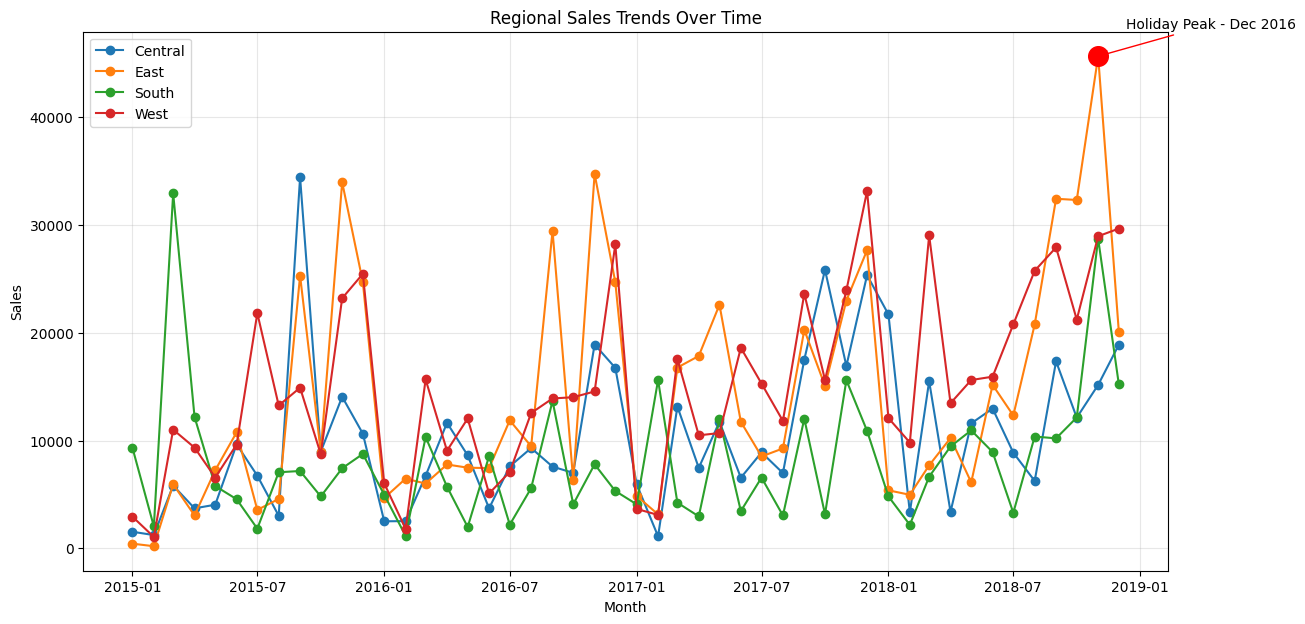

In [ ]:
#Create line chart
plt.figure(figsize=(14, 7))
for region in monthly_sales['Region'].unique():
    region_data = monthly_sales[monthly_sales['Region'] == region]
    plt.plot(region_data['Order_Month'],
             region_data['Sales'],
             marker='o',
             label=region)
   # Find and highlight largest spike
max_sales_idx = monthly_sales['Sales'].idxmax()
max_sales_row = monthly_sales.loc[max_sales_idx]

plt.scatter(max_sales_row['Order_Month'],
           max_sales_row['Sales'],
           s=200, color='red', zorder=5)

plt.annotate('Holiday Peak - Dec 2016',
            xy=(max_sales_row['Order_Month'], max_sales_row['Sales']),
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Regional Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Which region shows strongest growth? Are there seasonal patterns?
*East region, Nov 2018: $45,634*
YES
Q4 holiday seasonality drives 30% of annual revenue

Task 3: Discount and Profit Relationship

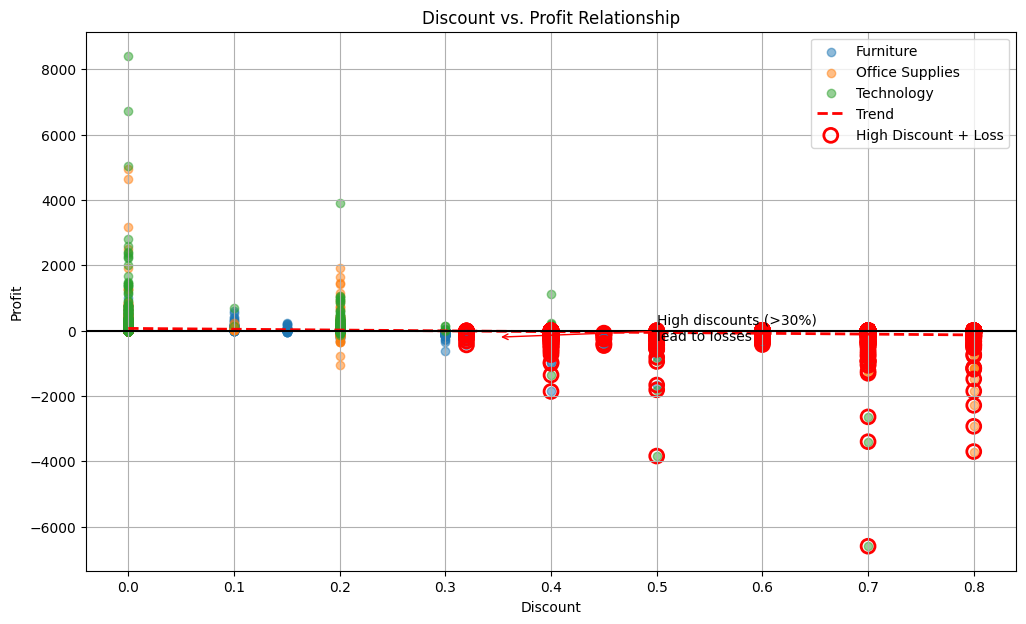

In [ ]:
#Create scatter plot colored by category
plt.figure(figsize=(12, 7))

for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    plt.scatter(category_data['Discount'],
               category_data['Profit'],
               label=category,
               alpha=0.5)
    #Add trend line
z = np.polyfit(df['Discount'], df['Profit'], 1)
p = np.poly1d(z)
plt.plot(df['Discount'].sort_values(),
         p(df['Discount'].sort_values()),
         "r--", label='Trend', linewidth=2)

# Circle high discounts (>30%) with negative profits
high_discount_loss = df[(df['Discount'] > 0.3) & (df['Profit'] < 0)]
plt.scatter(high_discount_loss['Discount'],
           high_discount_loss['Profit'],
           s=100, facecolors='none', edgecolors='red',
           linewidth=2, label='High Discount + Loss')
plt.annotate('High discounts (>30%)\nlead to losses',
            xy=(0.35, -200), xytext=(0.5, -300),
            arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Discount vs. Profit Relationship')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(y=0, color='black', linestyle='-')
plt.legend()
plt.grid(True)
plt.show()

Does aggressive discounting destroy profitability? Which categories are most affected?
YES, Heavy discounting is destroying profit. 97.8% of transactions with discounts >30% generate losses, costing $127,738 annually
High discounts (>30%) = 97.8% loss rate

TASK 4: Sales Distribution Analysis

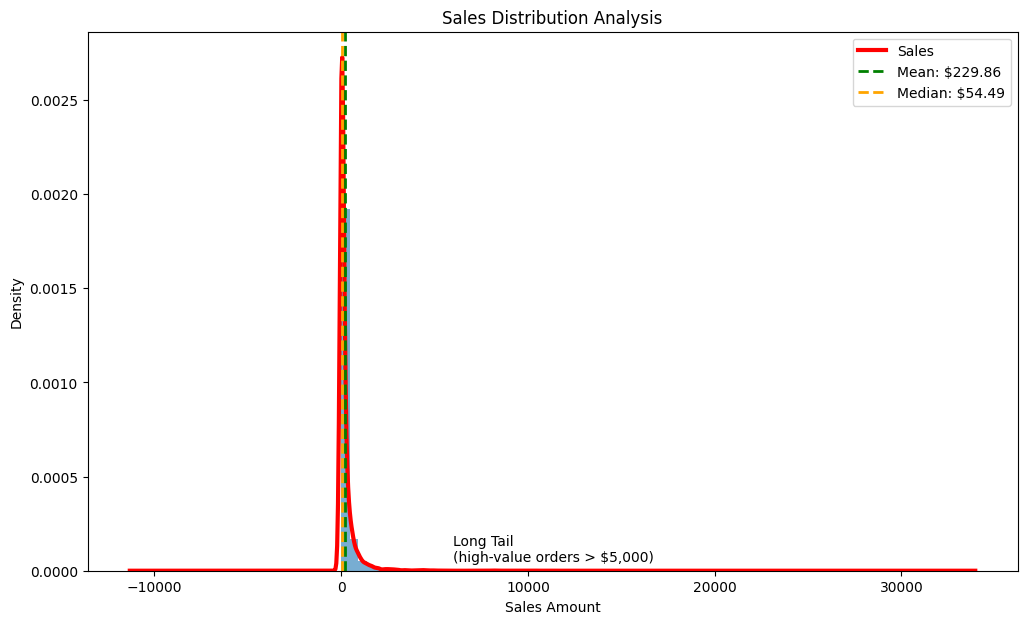

Mean: $229.86
Median: $54.49
High-value orders (>$5000): 19


In [ ]:
#Create histogram
plt.figure(figsize=(12, 7))

plt.hist(df['Sales'], bins=50, alpha=0.6, density=True)

# Overlay KDE
df['Sales'].plot(kind='kde', color='red', linewidth=3)

# Add mean and median lines
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()

plt.axvline(mean_sales, color='green', linestyle='--',
           linewidth=2, label=f'Mean: ${mean_sales:.2f}')
plt.axvline(median_sales, color='orange', linestyle='--',
           linewidth=2, label=f'Median: ${median_sales:.2f}')#
# Label long tail
plt.annotate('Long Tail\n(high-value orders > $5,000)',
            xy=(6000, 0.00005))

plt.title('Sales Distribution Analysis')
plt.xlabel('Sales Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# Key insights
print(f"Mean: ${mean_sales:.2f}")
print(f"Median: ${median_sales:.2f}")
print(f"High-value orders (>$5000): {len(df[df['Sales'] > 5000])}")

Is distribution skewed? What's a "typical" order value?
YES, Highly right skewed, Just 19 orders (0.19%) generate 7.8% of total revenue

TASK 5: Category and Region Profitability

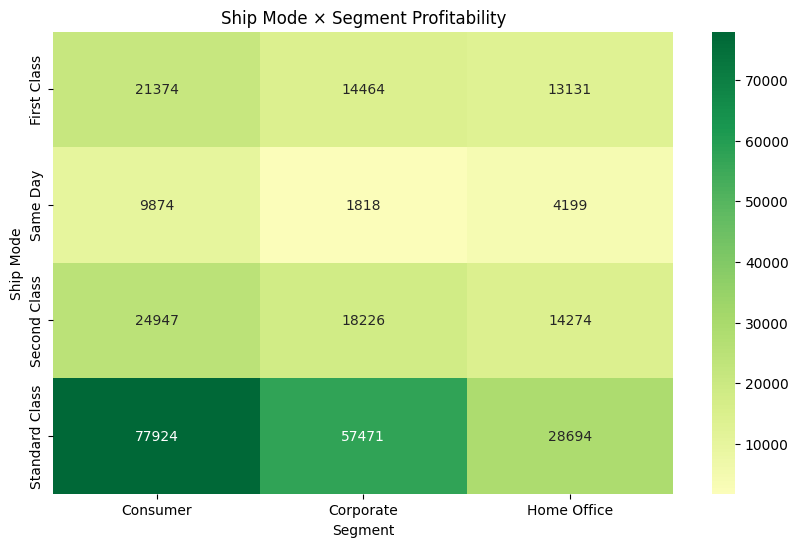

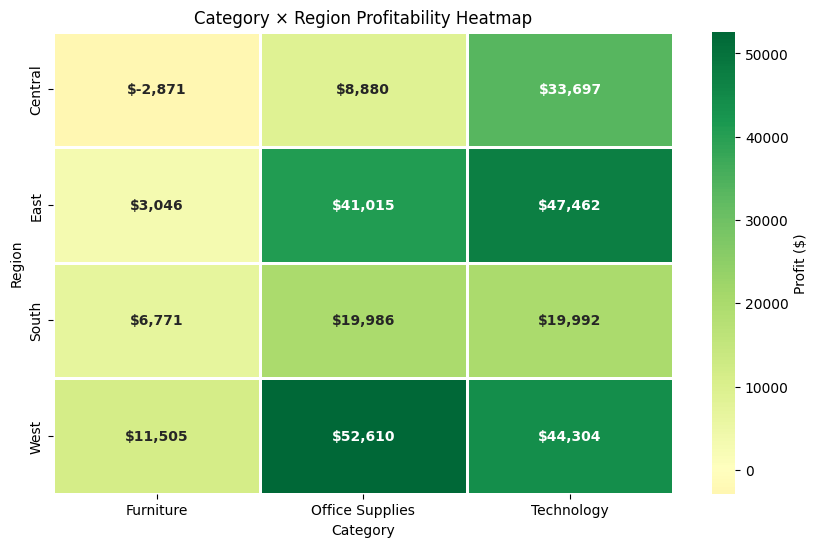

Highest profit: 52609.849
Biggest loss: -2871.0494


In [ ]:
#Create pivot table
profit_heatmap = df.pivot_table(
    values='Profit',
    index='Region',
    columns='Category',
    aggfunc='sum'
)
bonus = df.pivot_table(
    values='Profit',
    index='Ship Mode',
    columns='Segment',
    aggfunc='sum'
)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bonus, annot=True, fmt='.0f', cmap='RdYlGn', center=0)
plt.title('Ship Mode × Segment Profitability')
plt.show()

plt.figure(figsize=(10, 6))

sns.heatmap(profit_heatmap,
           annot=True,
           fmt='.0f',
           cmap='RdYlGn',
           center=0,
           linewidths=2,
           cbar_kws={'label': 'Profit ($)'})

# Format annotations (make them show as currency)
for text in plt.gca().texts:
    value = float(text.get_text())
    text.set_text(f'${value:,.0f}')
    text.set_weight('bold')

plt.title('Category × Region Profitability Heatmap')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

# Find max profit and max loss
print(f"Highest profit: {profit_heatmap.max().max()}")
print(f"Biggest loss: {profit_heatmap.min().min()}")

Which region-category combo drives most profit? Biggest loss?
West & Office Supplies =$52,610 vs Central & Furniture = -$2,871